<a href="https://colab.research.google.com/github/wangui-jane/Python_jane/blob/main/GRAPHICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRAPHICS

In [1]:
# You might also need to install statsmodels if not already installed
!pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import statsmodels.api as sm # statsmodels is needed for get_rdataset
from mpl_toolkits.mplot3d import Axes3D

# Helper for ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

x = np.array([
    3624, 6315, 4530, 3378, 5114, 4884, 5268, 5263, 3651, 4210,
    4625, 5368, 4330, 4429, 4355, 3560, 3378, 4049, 4984, 4329,
    5393, 4600, 4416, 3449, 4329, 3651, 4807, 4578, 5248, 3540,
    3800, 4500, 4990, 4306, 5147, 4535, 4881, 3977, 4677, 4248,
    4335, 3800, 4620, 4930, 4835, 3461, 4697, 4158, 4190, 3636
])

# manually hard-coded Population (in thousands)
pop = np.array([
    3615, 365, 2212, 2110, 21198, 2644, 3106, 579, 9160, 4931,
    1106, 943, 11432, 6103, 2778, 2362, 3771, 4212, 1067, 4365,
    5892, 9173, 4266, 2531, 5082, 674, 1714, 800, 920, 7077,
    1514, 18076, 6623, 617, 10806, 2964, 2515, 11527, 947, 3498,
    690, 5513, 14274, 841, 511, 5285, 4081, 1836, 5324, 469
])

# manually hard-coded Illiteracy (%)
ill = np.array([
    2.1, 1.5, 1.8, 2.2, 1.1, 1.9, 1.3, 1.8, 1.4, 1.1,
    0.9, 1.5, 0.9, 0.8, 0.5, 0.8, 1.9, 2.1, 0.7, 0.8,
    0.9, 1.0, 0.6, 2.5, 1.1, 1.1, 0.7, 1.9, 0.5, 0.9,
    2.6, 1.0, 1.9, 0.6, 1.1, 1.7, 1.5, 1.0, 1.1, 2.1,
    0.7, 1.6, 1.6, 0.7, 0.6, 1.4, 1.4, 2.5, 0.7, 1.6
])

# build a DataFrame
state = pd.DataFrame({
    'Population': pop,
    'Income':     x,
    'Illiteracy': ill
})

# quakes
# Correctly load the 'quakes' dataset using statsmodels
quakes = sm.datasets.get_rdataset('quakes').data
y = quakes['depth']

# InsectSprays, trees, etc.
# Correctly load 'InsectSprays' and 'trees' datasets
InsectSprays = sm.datasets.get_rdataset('InsectSprays').data
trees        = sm.datasets.get_rdataset('trees').data

crimtab = sm.datasets.get_rdataset("crimtab", "datasets").data

Puromycin = sm.datasets.get_rdataset("Puromycin", "datasets").data

VADeaths = sm.datasets.get_rdataset("VADeaths", "datasets").data

AirPassengers = sm.datasets.get_rdataset("AirPassengers", "datasets").data
presidents = sm.datasets.get_rdataset("presidents", "datasets").data

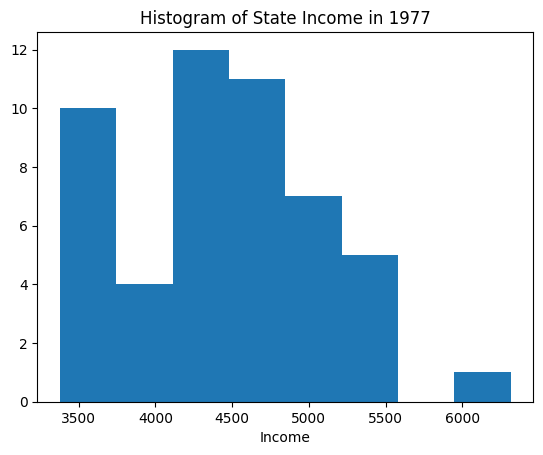

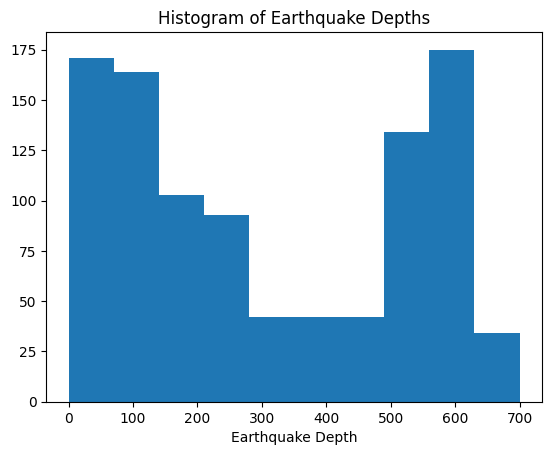

In [2]:
# 1. Histograms
plt.figure()
plt.hist(x, bins=8)
plt.xlabel('Income')
plt.title('Histogram of State Income in 1977')
plt.show()

plt.figure()
plt.hist(y, bins=np.arange(0, 770, 70))
plt.xlabel('Earthquake Depth')
plt.title('Histogram of Earthquake Depths')
plt.show()


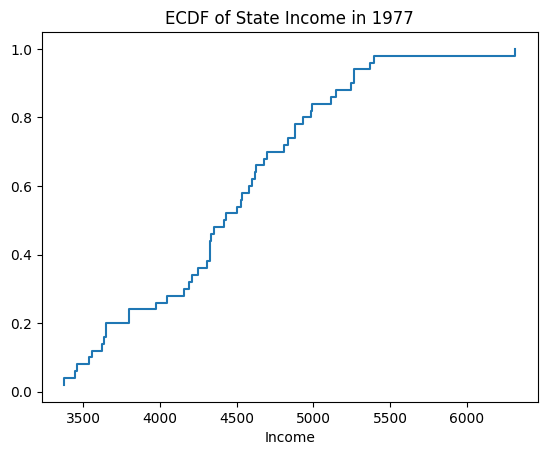

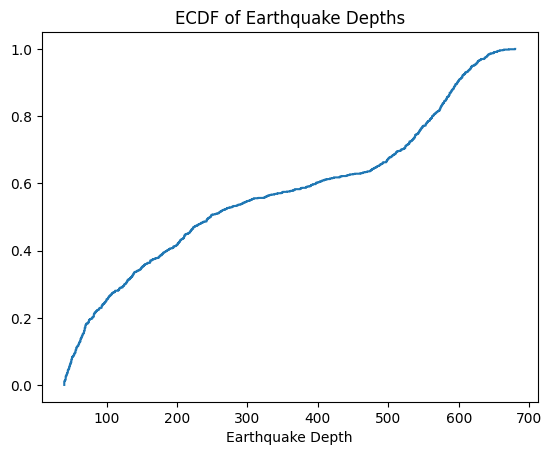

In [3]:
# 2. ECDFs
xs, ys = ecdf(x)
plt.figure()
plt.step(xs, ys, where='post')
plt.xlabel('Income')
plt.title('ECDF of State Income in 1977')
plt.show()

xs2, ys2 = ecdf(y)
plt.figure()
plt.step(xs2, ys2, where='post')
plt.xlabel('Earthquake Depth')
plt.title('ECDF of Earthquake Depths')
plt.show()

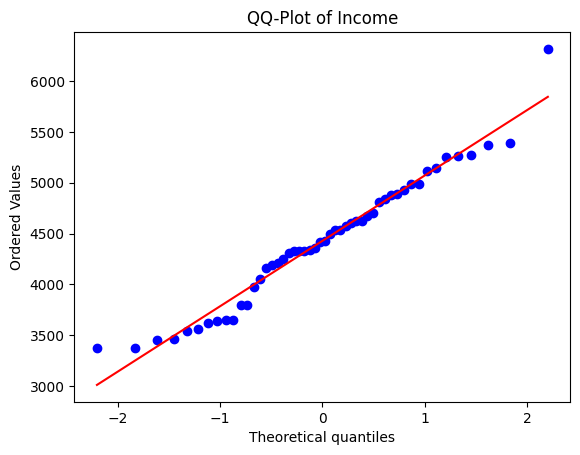

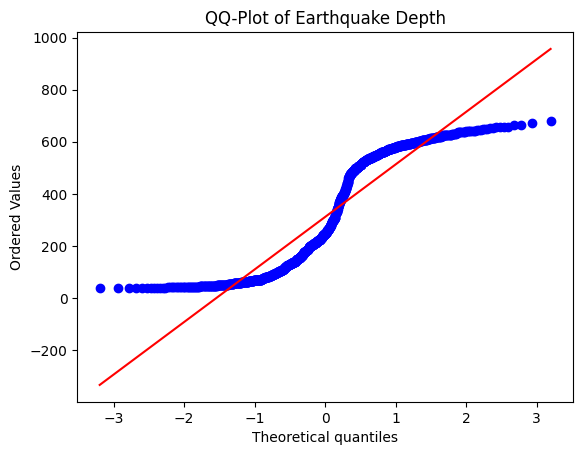

In [4]:
# 3. QQ Plots
plt.figure()
probplot(x, dist='norm', plot=plt)
plt.title('QQ-Plot of Income')
plt.show()

plt.figure()
probplot(y, dist='norm', plot=plt)
plt.title('QQ-Plot of Earthquake Depth')
plt.show()

<Figure size 640x480 with 0 Axes>

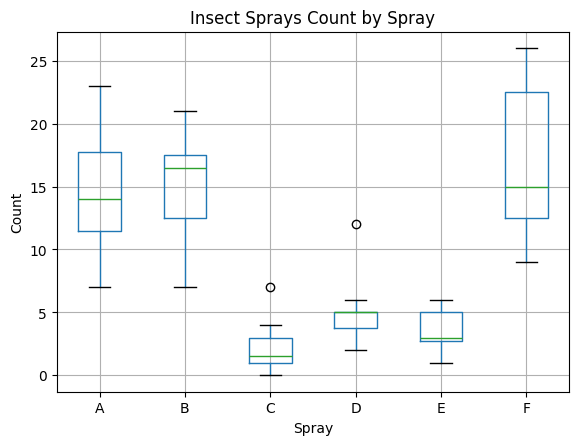

In [5]:
# 4. Boxplot
plt.figure()
InsectSprays.boxplot(column='count', by='spray')
plt.title('Insect Sprays Count by Spray')
plt.suptitle('')
plt.xlabel('Spray')
plt.ylabel('Count')
plt.show()

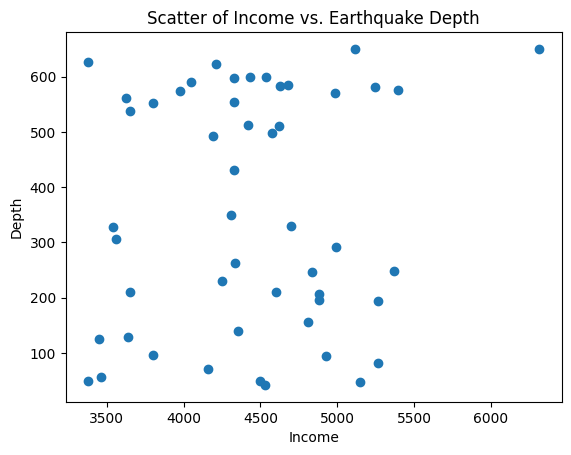

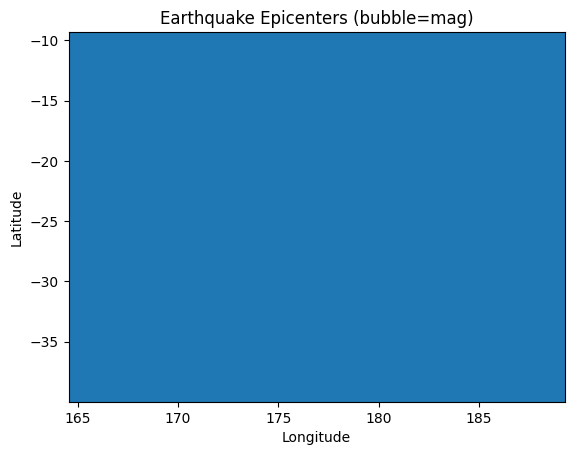

In [6]:
# 5. Scatter and Bubble Plots
plt.figure()
plt.scatter(x, y[:len(x)])
plt.xlabel('Income')
plt.ylabel('Depth')
plt.title('Scatter of Income vs. Earthquake Depth')
plt.show()

plt.figure()
plt.scatter(quakes['long'], quakes['lat'], s=10**quakes['mag'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Epicenters (bubble=mag)')
plt.show()

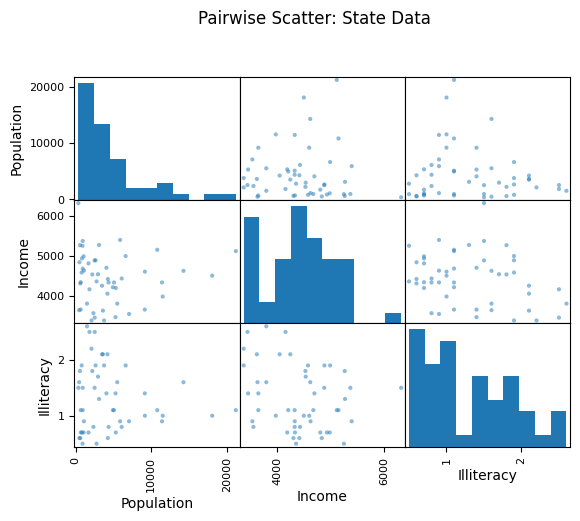

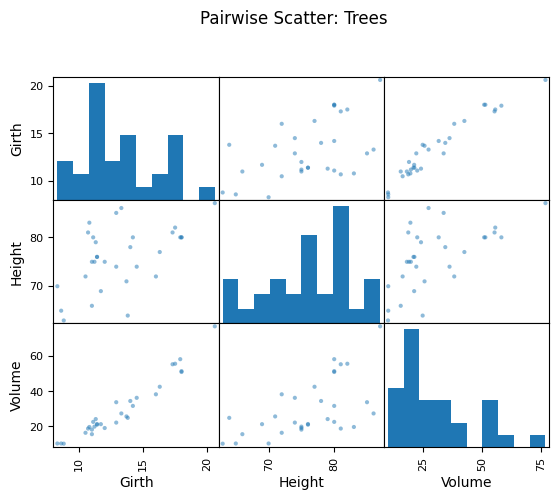

In [7]:
# 6. Pairwise Scatter
from pandas.plotting import scatter_matrix
scatter_matrix(state[['Population','Income','Illiteracy']], diagonal='hist')
plt.suptitle('Pairwise Scatter: State Data', y=1.02)
plt.show()

scatter_matrix(trees, diagonal='hist')
plt.suptitle('Pairwise Scatter: Trees', y=1.02)
plt.show()

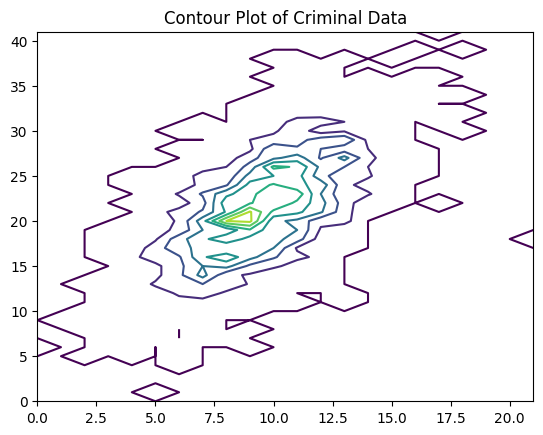

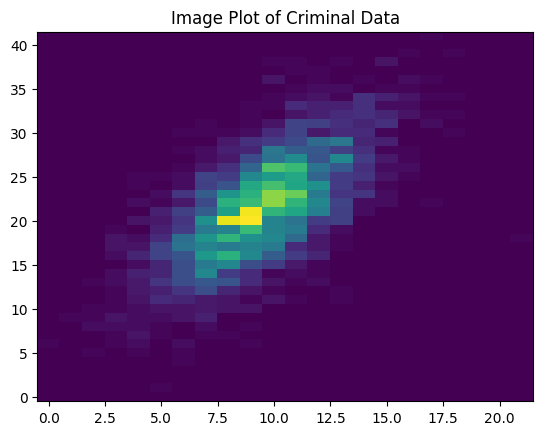

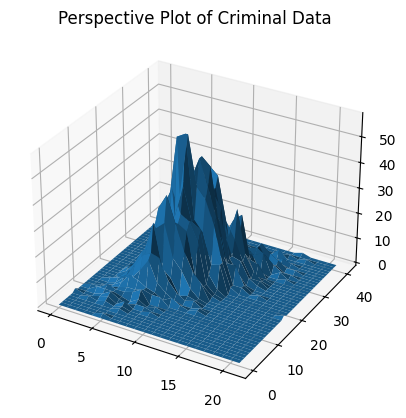

In [8]:
# 7. Contour, Image & 3D Surface
ct = crimtab.pivot(index='Var1', columns='Var2', values='Freq')
z = ct.values

plt.figure()
plt.contour(z)
plt.title('Contour Plot of Criminal Data')
plt.show()

plt.figure()
plt.imshow(z, origin='lower', aspect='auto')
plt.title('Image Plot of Criminal Data')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(range(z.shape[1]), range(z.shape[0]))
ax.plot_surface(X, Y, z)
plt.title('Perspective Plot of Criminal Data')
plt.show()

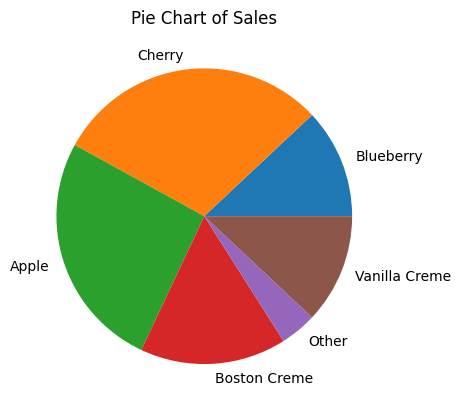

<Figure size 640x480 with 0 Axes>

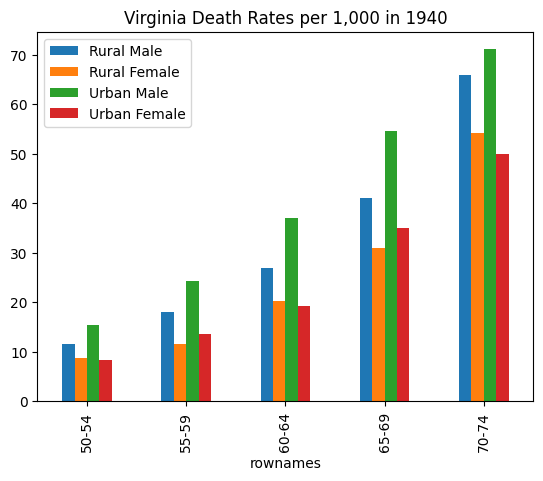

In [9]:
# 8. Pie & Bar Charts
pie_sales = [0.12, 0.30, 0.26, 0.16, 0.04, 0.12]
labels = ['Blueberry','Cherry','Apple','Boston Creme','Other','Vanilla Creme']
plt.figure()
plt.pie(pie_sales, labels=labels)
plt.title('Pie Chart of Sales')
plt.show()

plt.figure()
VADeaths.plot(kind='bar')
plt.title('Virginia Death Rates per 1,000 in 1940')
plt.show()

<ipython-input-10-1585139863>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  AirPassengers.index = pd.date_range(start='1949-01-01', periods=len(AirPassengers), freq='M')


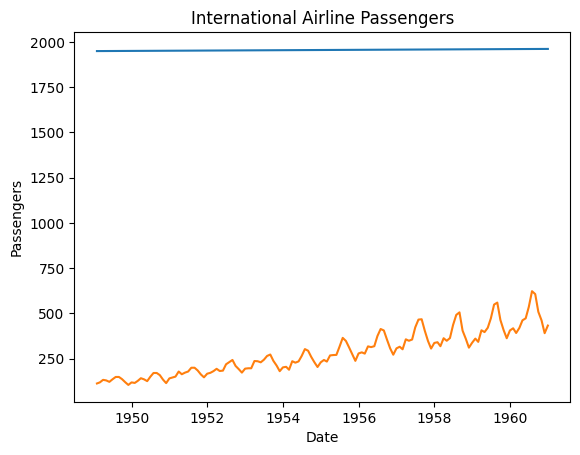

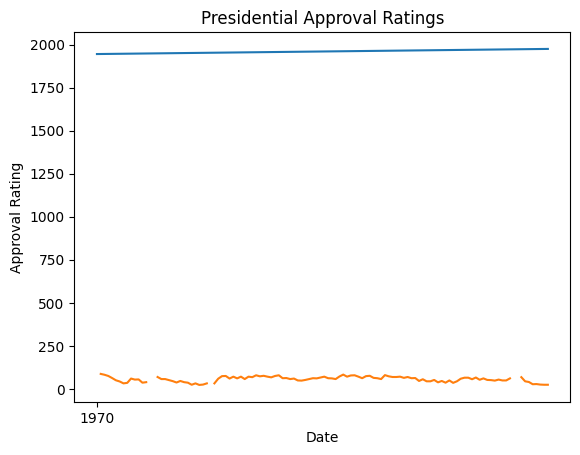

In [10]:
# 9. Time Series
AirPassengers.index = pd.date_range(start='1949-01-01', periods=len(AirPassengers), freq='M')
plt.figure()
plt.plot(AirPassengers)
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('International Airline Passengers')
plt.show()

try:
    presidents.index = pd.to_datetime(presidents.index)
except:
    pass
plt.figure()
plt.plot(presidents)
plt.xlabel('Date')
plt.ylabel('Approval Rating')
plt.title('Presidential Approval Ratings')
plt.show()

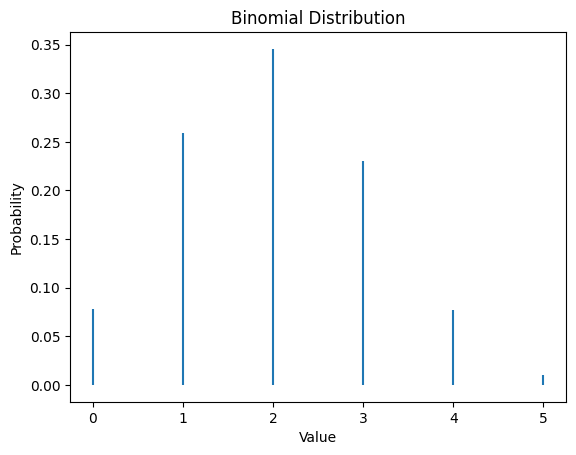

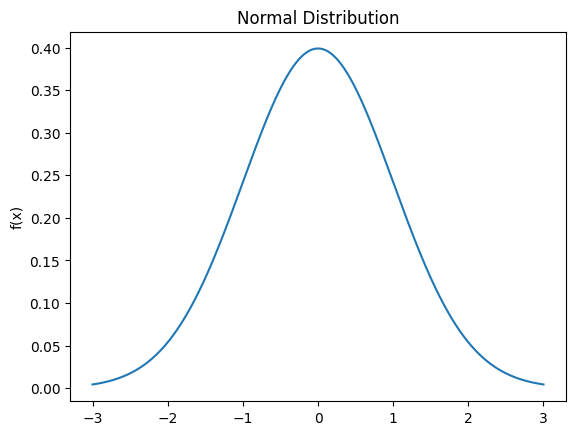

In [11]:
# 10. Distribution Functions
from scipy.stats import binom, norm
x_binom = np.arange(0,6)
y_binom = binom.pmf(x_binom, 5, 2/5)
plt.figure()
plt.vlines(x_binom, 0, y_binom)
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

x_norm = np.linspace(-3, 3, 601)
y_norm = norm.pdf(x_norm)
plt.figure()
plt.plot(x_norm, y_norm)
plt.title('Normal Distribution')
plt.ylabel('f(x)')
plt.show()

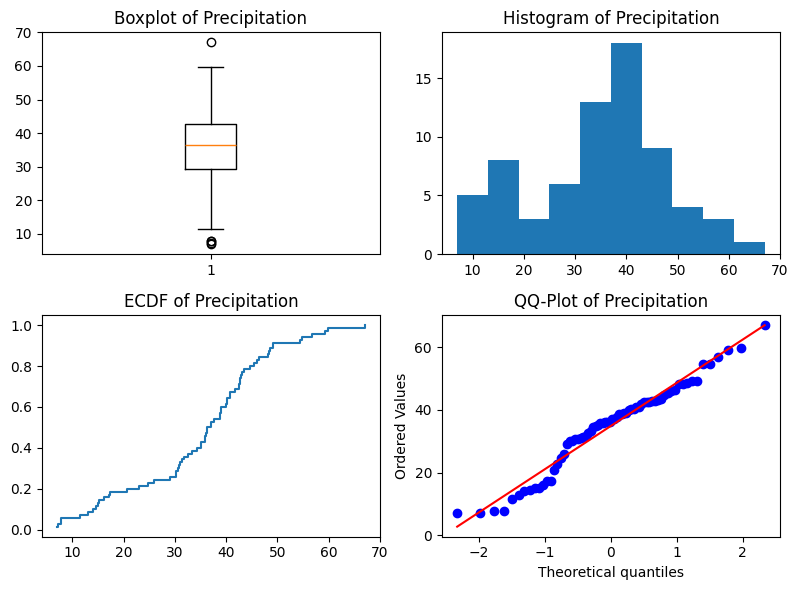

In [12]:
# 11. Custom Layouts & Combined Plots
precip = sm.datasets.get_rdataset('precip','datasets').data.squeeze()
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.boxplot(precip)
plt.title('Boxplot of Precipitation')
plt.subplot(2,2,2)
plt.hist(precip)
plt.title('Histogram of Precipitation')
plt.subplot(2,2,3)
xp, yp = ecdf(precip)
plt.step(xp, yp, where='post')
plt.title('ECDF of Precipitation')
plt.subplot(2,2,4)
probplot(precip, dist='norm', plot=plt)
plt.title('QQ-Plot of Precipitation')
plt.tight_layout()
plt.show()

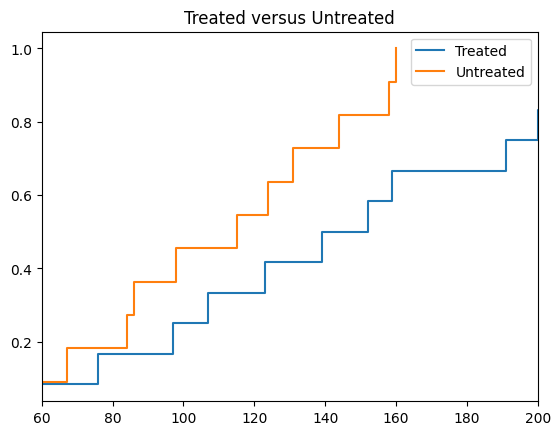

In [13]:
# 12. Puromycin ECDF Comparison
treated = Puromycin[Puromycin['state']=='treated']['rate']
untreated = Puromycin[Puromycin['state']=='untreated']['rate']
plt.figure()
xt, yt = ecdf(treated)
plt.step(xt, yt, where='post', label='Treated')
xu, yu = ecdf(untreated)
plt.step(xu, yu, where='post', label='Untreated')
plt.xlim(60, 200)
plt.title('Treated versus Untreated')
plt.legend()
plt.savefig('2cdfs.pdf')
plt.show()


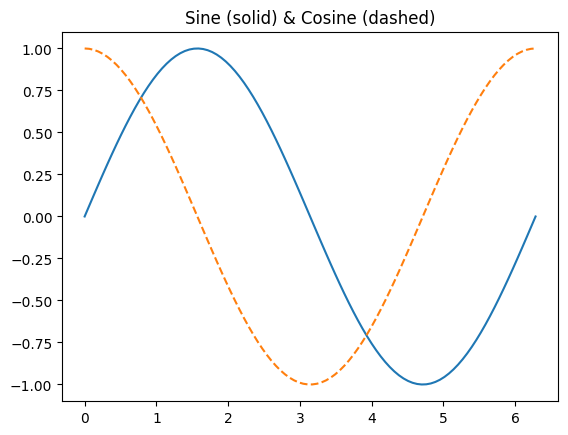

In [14]:
# 13. Matplot Example
x_vals = np.linspace(0, 2*np.pi, 100)
sine = np.sin(x_vals)
cosine = np.cos(x_vals)
plt.figure()
plt.plot(x_vals, sine)
plt.plot(x_vals, cosine, linestyle='--')
plt.title('Sine (solid) & Cosine (dashed)')
plt.show()